In [271]:
# pip install librosa

In [272]:
#The output of this section is the CSV files with the data to be handle by the model
CREATE_CSV_FILES = True

In [273]:
# Defines the names of the CSV files
TRAIN_CSV_FILE = "Speaker_Train_File.csv"    # train  60
TEST_CSV_FILE = "Speaker_Test_File.csv"      # test 16

In [274]:
# import matplotlib.pyplot as plt
import scipy.io.wavfile
import numpy as np
from matplotlib import cm
import pandas as pd
import librosa
import zipfile as zf
import csv
import os
from sklearn import metrics
import pandas as pd
from sklearn.metrics import classification_report, confusion_matrix
import csv
from sklearn import preprocessing
from sklearn.tree import DecisionTreeClassifier
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.mixture import GaussianMixture

In [275]:
def extractWavFeatures(soundFilesFolder, csvFileName):
    print("The features of the files in the folder "+soundFilesFolder+" will be saved to "+csvFileName)
    header = 'filename chroma_stft rmse spectral_centroid spectral_bandwidth rolloff zero_crossing_rate'  
    for i in range(1, 41):
        header += f' mfcc{i}'  #making headers of csv file
    header += ' label'     
    header = header.split()
    print('CSV Header: ', header)
    file = open(csvFileName, 'w', newline='')
    #with file:
    writer = csv.writer(file)
    writer.writerow(header)
    for filename in os.listdir(soundFilesFolder):
        if filename.endswith('.wav'):
            number = f'{soundFilesFolder}/{filename}'
            y, sr = librosa.load(number, mono=True, duration=30)
            # remove leading and trailing silence
            y, index = librosa.effects.trim(y)
            chroma_stft = librosa.feature.chroma_stft(y=y, sr=sr)
            rmse = librosa.feature.rms(y=y)
            spec_cent = librosa.feature.spectral_centroid(y=y, sr=sr)
            spec_bw = librosa.feature.spectral_bandwidth(y=y, sr=sr)
            rolloff = librosa.feature.spectral_rolloff(y=y, sr=sr)
            zcr = librosa.feature.zero_crossing_rate(y)
            mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc = 40)
            to_append = f'{filename} {np.mean(chroma_stft)} {np.mean(rmse)} {np.mean(spec_cent)} {np.mean(spec_bw)} {np.mean(rolloff)} {np.mean(zcr)}'
            for e in mfcc:
                to_append += f' {np.mean(e)}'
            writer.writerow(to_append.split())
    file.close()
    print("End of extractWavFeatures")

In [276]:
if (CREATE_CSV_FILES == True):
    extractWavFeatures("Speaker_Train_Data", TRAIN_CSV_FILE)
    # extractWavFeatures("Speaker_Test_Data", TEST_CSV_FILE)
    print("CSV files are created")
else:
    print("CSV files creation is skipped")

The features of the files in the folder Speaker_Train_Data will be saved to Speaker_Train_File.csv
CSV Header:  ['filename', 'chroma_stft', 'rmse', 'spectral_centroid', 'spectral_bandwidth', 'rolloff', 'zero_crossing_rate', 'mfcc1', 'mfcc2', 'mfcc3', 'mfcc4', 'mfcc5', 'mfcc6', 'mfcc7', 'mfcc8', 'mfcc9', 'mfcc10', 'mfcc11', 'mfcc12', 'mfcc13', 'mfcc14', 'mfcc15', 'mfcc16', 'mfcc17', 'mfcc18', 'mfcc19', 'mfcc20', 'mfcc21', 'mfcc22', 'mfcc23', 'mfcc24', 'mfcc25', 'mfcc26', 'mfcc27', 'mfcc28', 'mfcc29', 'mfcc30', 'mfcc31', 'mfcc32', 'mfcc33', 'mfcc34', 'mfcc35', 'mfcc36', 'mfcc37', 'mfcc38', 'mfcc39', 'mfcc40', 'label']
End of extractWavFeatures
CSV files are created


In [277]:
#Reading a dataset and convert file name to corresbonding umnber
def preProcessData(csvFileName):
    header_name_list = ['filename', 'chroma_stft', 'rmse', 'spectral_centroid', 'spectral_bandwidth', 'rolloff', 'zero_crossing_rate', 'mfcc1', 'mfcc2', 'mfcc3', 'mfcc4', 'mfcc5', 'mfcc6', 'mfcc7', 'mfcc8', 'mfcc9', 'mfcc10', 'mfcc11', 'mfcc12', 'mfcc13', 'mfcc14', 'mfcc15', 'mfcc16', 'mfcc17', 'mfcc18', 'mfcc19', 'mfcc20', 'mfcc21', 'mfcc22', 'mfcc23', 'mfcc24', 'mfcc25', 'mfcc26', 'mfcc27', 'mfcc28', 'mfcc29', 'mfcc30', 'mfcc31', 'mfcc32', 'mfcc33', 'mfcc34', 'mfcc35', 'mfcc36', 'mfcc37', 'mfcc38', 'mfcc39', 'mfcc40']
    print(csvFileName+ " will be preprocessed")
    data =  pd.read_csv(csvFileName)
    # print(data.head())
#     data = pd.read_csv(csvFileName, skiprows=[1, 50]
    # we have 3 speakers: 
    # 0: ahmed
    # 1: belal
    # 2: micheal
    # 3: others
    filenameArray = data['filename']
    data = data.drop(['filename'],axis=1)
    data = data.drop(['label'],axis=1)
    data = data.drop(['chroma_stft'],axis=1)
    
    speakerArray = []
#     print(filenameArray)
    for filename in filenameArray:
        #print(speaker)
        if "ahmed_ashraf" in filename:
            speaker = 0
        elif "Belal" in filename:
            speaker = 1
        elif "Michael" in filename:
            if 'CTD' in filename:
               speaker = 21
            elif 'OTW' in filename:
                speaker = 22
            else:
                speaker = 20
        else: 
            speaker = 3
        print(speaker)
        speakerArray.append(speaker)
    data['number'] = speakerArray
    #Dropping unnecessary columns
    
#     data.shape
#     print("Preprocessing is finished")
#     print(data['rmse'])
    print(data)
    return data

In [278]:
trainData = preProcessData(TRAIN_CSV_FILE)
testData = preProcessData(TEST_CSV_FILE)

Speaker_Train_File.csv will be preprocessed
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
2

In [279]:
testData

,rmse,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,mfcc2,mfcc3,mfcc4,mfcc5,...,mfcc32,mfcc33,mfcc34,mfcc35,mfcc36,mfcc37,mfcc38,mfcc39,mfcc40,number
0,0.009993,1222.905682,1460.351945,2157.293701,0.060233,-533.275513,126.323990,-5.393278,7.978744,-1.688960,...,9.847920,6.317571,2.457523,2.565717,-0.549338,-1.875484,-0.544401,-0.735906,-3.623948,3
1,0.016585,1230.753953,1509.360576,2346.060131,0.049973,-485.665253,118.747414,-0.341144,14.197672,-8.606584,...,5.284318,7.979311,1.586594,2.322874,-2.114764,-1.790100,-0.101661,0.374472,-1.964005,3
2,0.013829,1166.165148,1480.120271,2109.620577,0.050800,-504.032043,127.963150,2.349404,14.097299,-8.987041,...,3.478289,7.570534,2.271217,2.971118,0.029042,-0.701853,1.432102,0.208487,-3.162876,3
3,0.015517,1387.471357,1609.152266,2662.320683,0.058013,-501.029175,112.742699,-15.422599,16.566858,-6.766524,...,4.116170,4.058353,1.534295,1.178144,-1.235215,1.639595,-3.728315,-2.688532,-1.636350,3
4,0.015835,1276.583495,1634.214861,2637.144470,0.039693,-499.826416,122.048950,-1.920735,24.336123,-6.788704,...,10.266263,15.390595,9.012878,7.133364,0.400037,-0.292058,-4.085672,0.174606,5.223323,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88,0.042985,1814.419202,2068.841427,3832.619167,0.078574,-434.496246,112.916397,14.558284,19.883001,2.654404,...,-2.922314,-5.019325,-4.526140,-4.617517,-4.716003,-5.655179,-4.306020,-4.753742,-3.474115,3
89,0.036381,1995.008828,2102.141285,3936.269531,0.079740,-454.976349,100.731712,16.845055,20.575390,12.396941,...,-4.975369,-5.245577,-4.434406,-6.300651,-4.143828,-4.713008,-3.595579,-6.107916,-2.948173,3
90,0.030267,2145.997022,2248.043801,4451.083646,0.099725,-495.136993,88.907959,21.396997,20.355251,9.377746,...,-5.482362,-4.185727,-4.232754,-5.212183,-2.876807,-3.669876,-4.746404,-4.561175,-1.552745,3
91,0.029816,2035.026065,2295.683010,4361.697110,0.084806,-481.398621,98.354515,25.813599,17.567360,14.787317,...,-3.813303,-4.131896,-3.526616,-5.430199,-3.725750,-3.397746,-3.936089,-5.319873,-2.225244,3


In [280]:
# Splitting the dataset into training, validation and testing dataset

X = trainData[trainData.columns[:-1]]
y = trainData[trainData.columns[-1]]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=41 )


# X_test = np.array(testData.iloc[:, :-1], dtype = float)
# y_test = testData.iloc[:, -1]

#X_test = X_val
#y_test = y_val
print("Y from training data:", y_train.shape)
print("Y from validation data:", y_test.shape)
print("Y from test data:", y_test.shape)

Y from training data: (366,)
Y from validation data: (122,)
Y from test data: (122,)


In [281]:
X_train

,rmse,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,mfcc2,mfcc3,mfcc4,mfcc5,...,mfcc31,mfcc32,mfcc33,mfcc34,mfcc35,mfcc36,mfcc37,mfcc38,mfcc39,mfcc40
219,0.012451,1628.045451,1570.896151,2997.446626,0.132380,-506.569244,125.478424,-16.737345,9.330605,-5.772117,...,-3.973578,-3.355634,-2.241719,-2.917938,-6.048579,-2.399112,-3.237247,-3.480981,-1.320943,-5.104504
123,0.016976,1366.253047,1424.747682,2398.105805,0.108438,-482.508698,119.172951,9.736968,8.211617,-7.198675,...,-2.334608,-4.142664,-5.944022,-5.536013,-6.223950,-5.395431,-4.567430,-4.128879,-3.768334,-3.324435
222,0.011977,1595.304525,1638.191423,2956.360284,0.119432,-575.713745,115.961922,11.774571,10.913615,1.641870,...,-4.734143,-2.220601,-5.108392,-2.842015,-4.543195,-1.497407,-1.270644,-4.581386,-3.093520,-4.183049
169,0.018229,1385.413172,1475.916162,2525.201206,0.108208,-483.239807,121.466110,6.941180,9.089681,-9.424400,...,-3.291214,-4.139083,-4.493179,-2.507671,-2.874926,-0.754194,-2.120404,-2.454461,-1.567602,0.540620
14,0.008567,1349.090787,1640.655500,2676.497396,0.050781,-540.000366,133.394684,-6.241394,22.814432,-3.187350,...,15.104139,12.454113,12.531468,11.780157,13.801014,5.039852,1.527306,-2.353929,-0.584018,3.254150
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80,0.013263,1452.128721,1667.249900,2860.432703,0.053560,-524.692261,109.867340,-11.703888,23.269215,-12.143272,...,12.086721,16.698780,14.589094,7.858709,7.903023,4.237939,4.274377,1.433021,2.442412,3.489484
482,0.029565,2120.853616,2129.802877,4182.073549,0.109063,-472.128906,96.123772,16.292709,22.398584,10.271820,...,-3.769502,-4.598513,-4.507093,-4.423782,-6.368574,-3.698211,-4.395226,-3.992664,-6.340884,-2.485655
396,0.047850,919.862363,1220.845000,1855.486067,0.054114,-395.589813,133.670303,7.571056,34.802750,23.814871,...,-6.397325,-3.889455,-5.997887,-7.017311,-5.232875,-4.997031,-4.687510,-2.073427,-0.137264,-1.216258
419,0.032846,832.580022,1171.117131,1539.624023,0.035331,-472.486786,141.390564,16.854698,25.683184,14.108668,...,-6.179024,-5.082310,-0.230579,-6.017405,-7.089130,-4.749471,-6.471596,-4.694207,-2.045562,-2.319459


In [282]:
#Normalizing the dataset
from sklearn.preprocessing import StandardScaler, normalize
import numpy as np
#scaler = StandardScaler()
#X_train = scaler.fit_transform( X_train )
#X_test = scaler.transform( X_test )
#X_train = normalize(X_train)
#X_test = normalize (X_test)
print("X from training data", X_train.shape)
print("X from test data", X_test.shape)

X from training data (366, 45)
X from test data (122, 45)


In [283]:

X_train.shape

(366, 45)

In [284]:
# gmm=GaussianMixture(n_components=6, max_iter=200 , covariance_type="diag" , n_init=3)
# gmm.fit(X_train)

In [285]:
#Create an object (model)
dtr1 = DecisionTreeClassifier(max_depth =7, random_state = 10)
#Fit (train) the model

#X_train = X_train.astype('int')

#y_train=y_train.astype('int')


dtr1.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=7, random_state=10)

In [286]:
np.unique(y_train  ,return_counts = True)


(array([ 0,  1,  3, 20, 21, 22], dtype=int64),
 array([ 39,  36, 126,  75,  36,  54], dtype=int64))

In [287]:
np.unique(y_test  ,return_counts = True)


(array([ 0,  1,  3, 20, 21, 22], dtype=int64),
 array([18, 14, 38, 21, 12, 19], dtype=int64))

In [288]:
pd.DataFrame(X_train)[pd.DataFrame(X_train).columns[3:9]].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 366 entries, 219 to 448
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   rolloff             366 non-null    float64
 1   zero_crossing_rate  366 non-null    float64
 2   mfcc1               366 non-null    float64
 3   mfcc2               366 non-null    float64
 4   mfcc3               366 non-null    float64
 5   mfcc4               366 non-null    float64
dtypes: float64(6)
memory usage: 20.0 KB


In [289]:
#plt the figure, setting a black background
# plt.figure(figsize=(30,10))
# #create the tree plot
# a = tree.plot_tree(dtr1,feature_names = list(['rmse', 'spectral_centroid', 'spectral_bandwidth', 
#                    'rolloff', 'zero_crossing_rate', 'mfcc1', 'mfcc2', 'mfcc3', 'mfcc4', 'mfcc5', 'mfcc6', 'mfcc7', 'mfcc8', 
#                    'mfcc9', 'mfcc10', 'mfcc11', 'mfcc12', 'mfcc13', 'mfcc14', 'mfcc15', 'mfcc16', 'mfcc17', 'mfcc18', 'mfcc19', 
#                    'mfcc20', 'mfcc21', 'mfcc22', 'mfcc23', 'mfcc24', 'mfcc25', 'mfcc26', 'mfcc27', 'mfcc28', 'mfcc29', 'mfcc30', 
#                    'mfcc31', 'mfcc32', 'mfcc33', 'mfcc34', 'mfcc35', 'mfcc36', 'mfcc37', 'mfcc38', 'mfcc39', 'mfcc40']),
#                    class_names = ["0", "1","4"],
#                    rounded = True,
#                    filled = True,
#                    fontsize=14)
# #show the plot
# plt.show()

In [290]:
# data = preProcessData('Speaker_File.csv')
test_pred_decision_tree = dtr1.predict(X_test)

print(test_pred_decision_tree)
print(np.array(y_test))


[ 3  0  0 20  3 21 21 20 22 20 21 22 20 20  0  3  3 20 22  0 20 20 20  3
  3 20 22 20  0  3 20  3 22  1 20  3  1  3  1  1  0  3 20  1  1 20  3 20
 22 20 22 22  0  3  0 22 20  3  0 22  1  3  3 20 22  3  3 22 21  3  1 20
  3  1  3  3 20 20  0  1  0  1 21 20 22 21  0 22  0  3 21  0  3  3 22  3
  3  3  3  1 22  3  3 20  3  1 22  3 20  3  0  3  3 21  3 20 22 20 20  0
 22  3]
[ 3  0  0 20  3 21 21 22 22 20 21 22 20 20  0  3  3 22 22  0 20 22 20  3
  3 20 20 20  0  3 21  3 22  1 20  3  1  3  1  1  0  3 21  1  1 20  3 20
 22  0  0 21  0  3  0 22 22  3  0 22  1  3  3 22 20  3  3 22 21  3  1 20
  3  1  3  3 20 20  0  1  0  1 21 20 22 21  0 22  0  3 21  0  3  3  3  3
  3  3  3  1 22  3  3 20  3  1 22  1 20  3  0  3  3 20  3 22 22 21 20  0
 21  3]


In [291]:
y_test=y_test.astype('int64')

print("Accuracy:",metrics.accuracy_score(y_test, test_pred_decision_tree))

Accuracy: 0.8524590163934426


In [292]:
def report(X_data, y_data):
    #Confution Matrix and Classification Report
    Y_pred = dtr1.predict(X_data)
    y_test_num = y_data.astype(np.int64)
    conf_mt = confusion_matrix(y_test_num, Y_pred)
    print(conf_mt)
    plt.matshow(conf_mt)
    plt.show()
    print('\nClassification Report')
    # target_names = ["Marina", "Mohab", "Unknown"]
    print(classification_report(y_test_num, Y_pred))

Classification Report for Test Data

[[16  0  0  1  0  1]
 [ 0 13  1  0  0  0]
 [ 0  0 37  0  0  1]
 [ 0  0  0 18  1  2]
 [ 0  0  0  3  7  2]
 [ 0  0  0  6  0 13]]


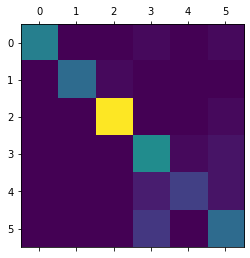


Classification Report
              precision    recall  f1-score   support

           0       1.00      0.89      0.94        18
           1       1.00      0.93      0.96        14
           3       0.97      0.97      0.97        38
          20       0.64      0.86      0.73        21
          21       0.88      0.58      0.70        12
          22       0.68      0.68      0.68        19

    accuracy                           0.85       122
   macro avg       0.86      0.82      0.83       122
weighted avg       0.87      0.85      0.85       122



In [293]:
print("Classification Report for Test Data\n")
report(X_test, y_test)

In [294]:
# save the model to disk
import pickle
filename = 'final_model_test.sav'
pickle.dump(dtr1, open(filename, 'wb'))


# load the model from disk
# loaded_model = pickle.load(open(filename, 'rb'))

In [295]:
loaded_model =pickle.load(open(filename, 'rb'))
result = loaded_model.score(X_test, y_test)
result

0.8524590163934426